In [65]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [66]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X=housing.data # you will get the numpy arry
Y=housing.target
df=pd.DataFrame(X)
print(df)
print(housing.feature_names)




            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [67]:
description=housing.DESCR
print(description)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [68]:
df.columns=housing['feature_names']
# df["MedHouseVal(Target)"]=housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [69]:
# sklearn basically provides the function to split the data into 2 parts
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15480, 8)
(5160, 8)
(15480,)
(5160,)


In [70]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()


In [71]:
alg1.fit(X_train,Y_train) # learn the pattern

LinearRegression()

In [72]:
Y_pred=alg1.predict(X_test) # predicting the output for x test data
Y_pred


array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

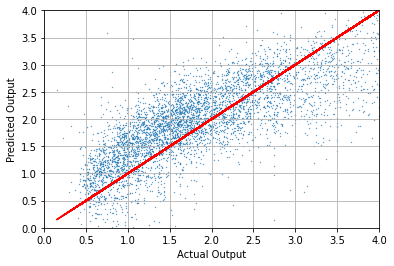

In [73]:
# Let's now compare the Y_pred(predicted output of the test data) with the actual output (Y_test)
plt.scatter(Y_test,Y_pred,s=0.1)
plt.axis([0,4,0,4])
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.plot(Y_test,Y_test,"r-")
plt.grid()
plt.show()

In [74]:
differ=(Y_pred-Y_test)**2
differ.sum()

2788.5300798418893

In [75]:
p=df.copy()
length=len(p.columns)
p.columns=[i for i in range(1,length+1)]
# print(p.head(3))
for i in p.columns:
    p[f"{i}^2"]=p[i]*p[i]
for i in range(1,length+1):
    for j in range(i,length+1):
        p[f"{i}*{j}"]=p[i]*p[j]

# print(p.head())
x=np.array(p)
x=np.round(x,decimals=5)
y=housing.target.reshape(-1,1)
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0)
from sklearn.linear_model import LinearRegression
alg2=LinearRegression()
alg2.fit(x,y)
# train_score=alg1.score(X_train,Y_train)
# test_score=alg1.score(X_test,Y_test)
print("R2 score for 1 degree Training data:",alg1.score(X_train,Y_train))
print("R2 score for 2 degree Training data:",alg2.score(x_train,y_train))
print("R2 score for 1 degree Testing data:",alg1.score(X_test,Y_test))
print("R2 score for 2 degree Testing data:",alg2.score(x_test,y_test))
 

R2 score for 1 degree : 0.6109633715458151
R2 score for 1 degree : 0.5911695436410482
R2 score for 2 degree : 0.6838415245799117
R2 score for 2 degree : 0.6815484750123082
